# Sharpe Ratio and Portfolio Values

## Create a Portfolio

In [5]:
import os
os.environ["HTTP_PROXY"] = "http://atlasproxy.isbank"
os.environ["HTTPS_PROXY"] = "http://atlasproxy.isbank"

In [6]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\IS96347\\AppData\\Roaming',
 'CLASSPATH': '.;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2java.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\sqlj.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc_license_cu.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\bin;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\common.jar;C:\\IBM\\RationalSDLC\\ClearQuest\\cqjni.jar',
 'CLEARQUEST_HOME': 'C:\\IBM\\RationalSDLC\\ClearQuest',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'T2LPRVT890',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'pyfinance',
 'CONDA_EXE': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\conda.exe',
 'CONDA_PREFIX': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyfinance',
 'CONDA_PROMPT_MODIFIER': '(pyfinance) ',


In [7]:
import pandas as pd
import quandl

In [8]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [9]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

ProxyError: HTTPSConnectionPool(host='www.quandl.com', port=443): Max retries exceeded with url: /api/v3/datasets/WIKI/AAPL/data?order=asc&start_date=2012-01-01+00%3A00%3A00&end_date=2017-01-01+00%3A00%3A00&column_index=11 (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 501 Not Implemented',)))

In [12]:
aapl = pd.read_csv("../09-Python-Finance-Fundamentals/AAPL_CLOSE", index_col="Date", parse_dates=True)
cisco = pd.read_csv("../09-Python-Finance-Fundamentals/CISCO_CLOSE", index_col="Date", parse_dates=True)
ibm = pd.read_csv("../09-Python-Finance-Fundamentals/IBM_CLOSE", index_col="Date", parse_dates=True)
amzn = pd.read_csv("../09-Python-Finance-Fundamentals/AMZN_CLOSE", index_col="Date", parse_dates=True)

In [13]:
aapl.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


## Normalize Prices

In [14]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [15]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,53.063218,1.000000
2012-01-04,53.348386,1.005374
2012-01-05,53.940658,1.016536
2012-01-06,54.504543,1.027162
2012-01-09,54.418089,1.025533


In [16]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.547742,2.177549
2016-12-27,116.281568,2.191378
2016-12-28,115.785740,2.182034
2016-12-29,115.755990,2.181473
2016-12-30,114.853583,2.164467


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [18]:
list(zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   53.063218       1.000000
  2012-01-04   53.348386       1.005374
  2012-01-05   53.940658       1.016536
  2012-01-06   54.504543       1.027162
  2012-01-09   54.418089       1.025533
  2012-01-10   54.612933       1.029205
  2012-01-11   54.523898       1.027527
  2012-01-12   54.374217       1.024706
  2012-01-13   54.170341       1.020864
  2012-01-17   54.801324       1.032755
  2012-01-18   55.370370       1.043479
  2012-01-19   55.194882       1.040172
  2012-01-20   54.233569       1.022056
  2012-01-23   55.150881       1.039343
  2012-01-24   54.247763       1.022323
  2012-01-25   57.634941       1.086156
  2012-01-26   57.372999       1.081220
  2012-01-27   57.714943       1.087664
  2012-01-30   58.454316       1.101598
  2012-01-31   58.902069       1.110036
  2012-02-01   58.864648       1.109331
  2012-02-02   58.726580       1.106729
  2012-02-03   59.314982       1.117817


In [19]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [20]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,53.063218,1.000000,0.300000
2012-01-04,53.348386,1.005374,0.301612
2012-01-05,53.940658,1.016536,0.304961
2012-01-06,54.504543,1.027162,0.308149
2012-01-09,54.418089,1.025533,0.307660


## Investment

In [21]:
# 1 milyon dolar yatırım yaptığımızı varsayalım
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [22]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [25]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']], axis=1)

In [26]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

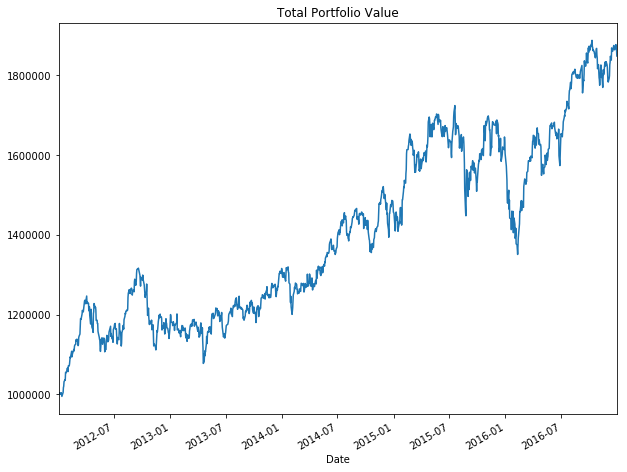

In [30]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

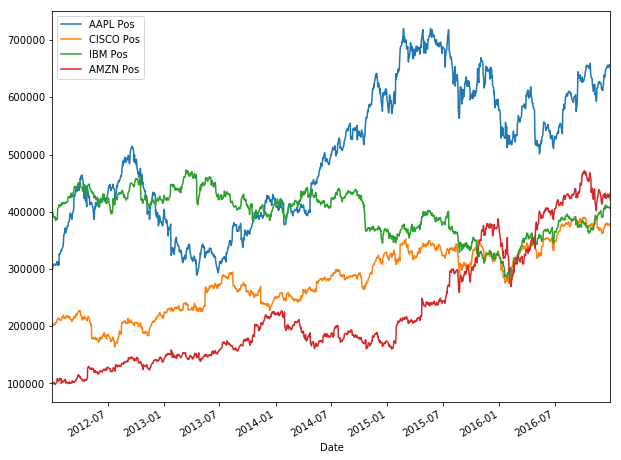

In [34]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))

## Portfolio Statistics

**Daily Returns**

In [35]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [43]:
portfolio_val["Daily Return"] = portfolio_val["Total Pos"].pct_change(1)

In [45]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


**Cumulative Return**

In [46]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665459 was percent!


**Avg Daily Return**

In [38]:
portfolio_val["Daily Return"].mean()

0.00054423307162152791

**Std Daily Return**

In [48]:
portfolio_val['Daily Return'].std()

0.010568287769162552

**Plot**

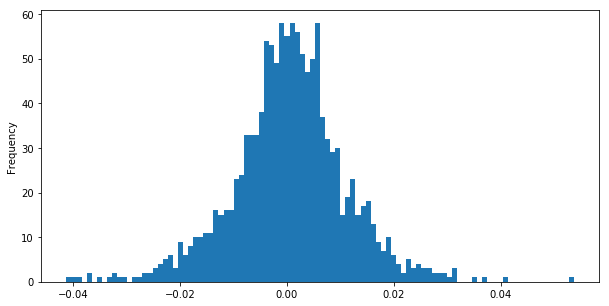

In [41]:
portfolio_val["Daily Return"].plot(kind="hist", bins=100, figsize=(10,5))

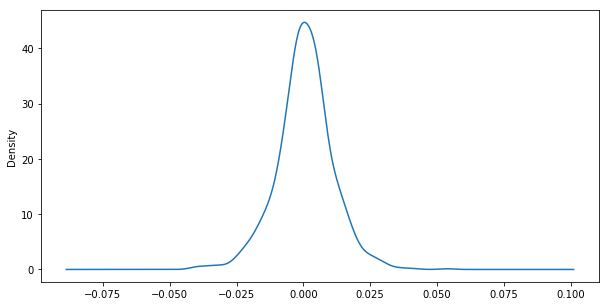

In [42]:
portfolio_val["Daily Return"].plot(kind="kde", figsize=(10,5))

## Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [49]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.051496806626477189

In [50]:
ASR = (252**0.5)*SR
ASR

0.81748646188585039

# Portfolio Optimization

## Monte Carlo Simulation for Optimization Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv('../09-Python-Finance-Fundamentals/AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('../09-Python-Finance-Fundamentals/CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('../09-Python-Finance-Fundamentals/IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('../09-Python-Finance-Fundamentals/AMZN_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [4]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [8]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Log Returns vs Arithmetic Returns

In [9]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


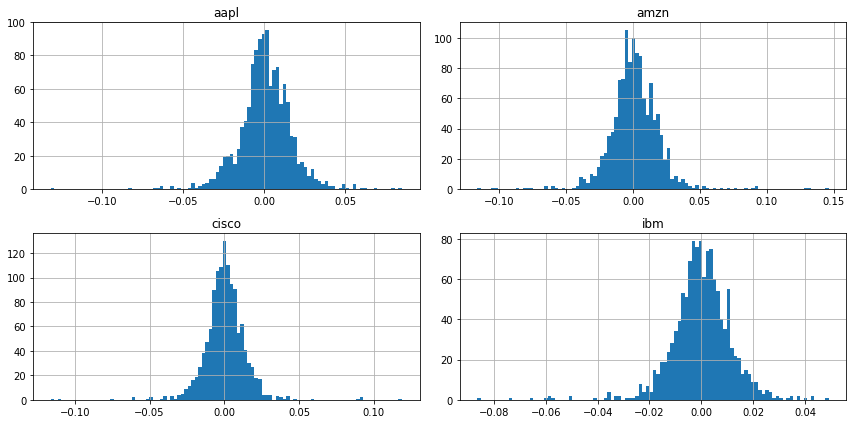

In [10]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [11]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [12]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [13]:
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [14]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


## Single Run for Some Random Allocation

In [15]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)

# Expected Volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.15599272049632004
Expected Volatility
0.18502649565909488
Sharpe Ratio
0.8430831483926032


In [16]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [17]:
sharpe_arr.max()

1.0303260551271065

In [18]:
sharpe_arr.argmax()

1419

In [19]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

**Plotting the data**

In [20]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

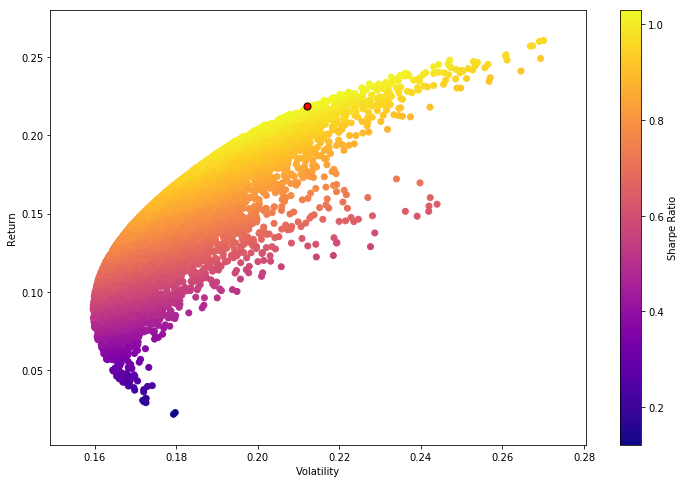

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## Mathematical Optimization

**Functionalize Return and SR operations**

In [22]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [23]:
from scipy.optimize import minimize

In [24]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``. The optimizing argument, ``x``, is a 1-D array
        of points, and ``args`` is a tuple of any additional fixed parameters
        needed 

In [25]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [26]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [27]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [28]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [29]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [30]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [31]:
opt_results

     fun: -1.0307168703356437
     jac: array([ 5.64306974e-05,  4.18275595e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289773e-01, 2.04189816e-01, 5.44676066e-17, 5.29520411e-01])

In [32]:
opt_results.x

array([2.66289773e-01, 2.04189816e-01, 5.44676066e-17, 5.29520411e-01])

In [33]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

## All Optimal Portfolios (Efficient Frontier)

In [34]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [35]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [36]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

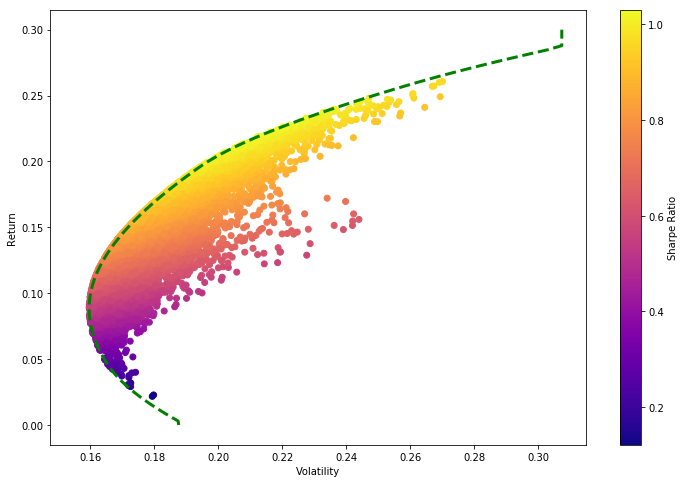

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# CAPM - Capital Asset Pricing Model

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $

### CAPM of a portfolio

## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [33]:
from scipy import stats

In [39]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [1]:
import pandas as pd
import pandas_datareader as web

In [15]:
spy_etf = web.DataReader('SPY','morningstar')

In [16]:
spy_etf = spy_etf.loc["SPY"][1:]

In [17]:
spy_etf.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,113.33,113.39,111.51,112.37,118944600
2010-01-05,113.63,113.68,112.85,113.26,111579900
2010-01-06,113.71,113.99,113.43,113.52,116074400
2010-01-07,114.19,114.33,113.18,113.50,131091100
2010-01-08,114.57,114.62,113.66,113.89,126402800


In [18]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2200 entries, 2010-01-04 to 2018-06-08
Data columns (total 5 columns):
Close     2200 non-null float64
High      2200 non-null float64
Low       2200 non-null float64
Open      2200 non-null float64
Volume    2200 non-null int64
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


In [19]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2018-06-08')

In [20]:
aapl = web.DataReader('AAPL','morningstar',start,end)

In [22]:
aapl = aapl.loc["AAPL"]

In [23]:
aapl.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,30.5729,30.6429,30.3400,30.5000,123432050
2010-01-05,30.6257,30.7986,30.4643,30.6843,150476004
2010-01-06,30.1386,30.7471,30.1071,30.6257,138039594
2010-01-07,30.0829,30.2857,29.8643,30.2400,119282324
2010-01-08,30.2829,30.2857,29.8657,30.0571,111969081


In [24]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2200 entries, 2010-01-04 to 2018-06-08
Data columns (total 5 columns):
Close     2200 non-null float64
High      2200 non-null float64
Low       2200 non-null float64
Open      2200 non-null float64
Volume    2200 non-null int64
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

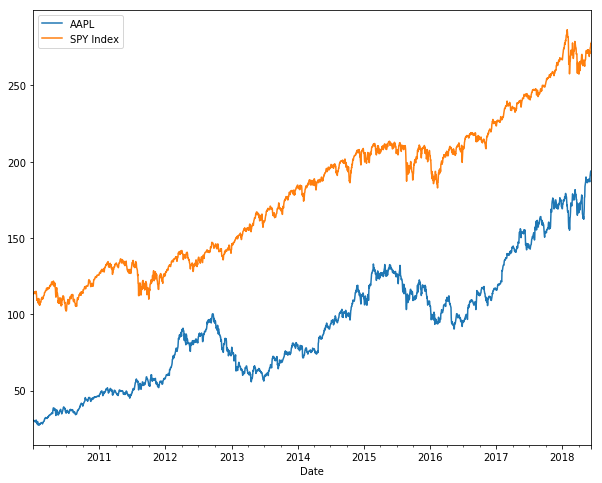

In [26]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [27]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

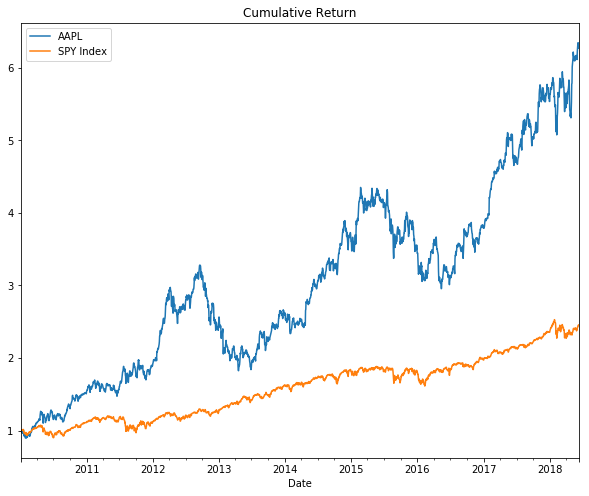

In [28]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [29]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

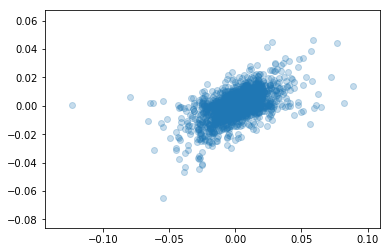

In [31]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)

In [34]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                      spy_etf['Daily Return'].iloc[1:])

In [35]:
beta

0.32968896002725456

In [36]:
alpha

0.00013469451993785669

In [37]:
r_value

0.56370873589139225

## What if our stock was completely related to SP500?

In [38]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [39]:
import numpy as np
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise

array([ -6.15737117e-04,   1.05893612e-03,  -1.25708203e-03, ...,
         1.41493869e-03,   6.40528771e-05,  -5.67230632e-04])

In [40]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

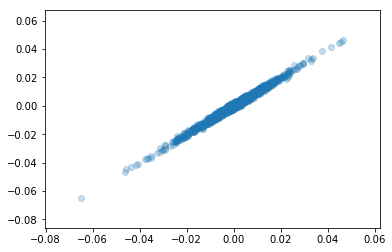

In [41]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [42]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                      spy_etf['Daily Return'].iloc[1:])

In [43]:
beta

0.98896525809693026

In [44]:
alpha

-7.2684302758746619e-06

In [45]:
r_value

0.99390120894624889